In [3]:
import pandas as pd
# Importamos el archivo Parquet utilizando pandas
df = pd.read_parquet('/Users/juand/Desktop/Tarea final/Tarea final/Tarea final/BBDD_TF_carac_sociodemograficas.parquet')
print(df)


         año  conglome  vivienda  hogar  codperso  ubigeo  male  edad  casado  \
0       2018      5002        34     11         1   10101   0.0  49.0     0.0   
1       2018      5002        34     11         2   10101   0.0  22.0     0.0   
2       2018      5002        34     11         3   10101   0.0  21.0     0.0   
5       2018      5002        83     11         1   10101   1.0  60.0     1.0   
6       2018      5002        83     11         2   10101   0.0  58.0     1.0   
...      ...       ...       ...    ...       ...     ...   ...   ...     ...   
128263  2019     11350        59     11         2  180101   1.0  29.0     0.0   
128265  2019     11350        78     11         1  180101   0.0  28.0     0.0   
128268  2019     11350        97     11         1  180101   1.0  35.0     0.0   
128273  2019     11350       116     11         1  180101   0.0  41.0     0.0   
128274  2019     11350       116     11         2  180101   1.0  22.0     0.0   

        educacion  ...  seg

In [4]:
print("Número de filas y columnas presentes en el dataframe: ", df.shape)

Número de filas y columnas presentes en el dataframe:  (52737, 25)


In [5]:
print(df.columns)

Index(['año', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'male',
       'edad', 'casado', 'educacion', 'enfermedad_cronica', 'seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis',
       'tamaño_empresa', 'gastos_mensuales', 'iddep', 'agua_potable',
       'electricidad', 'telefono', 'celular', 'tv', 'internet'],
      dtype='object')


In [6]:
#Eliminamos las variables que no son relevantes para el análisis. Se elimina el año puesto que solo hace referencia al año de la encuesta, lo que cual no tiene relevancia en el 
# modelo. 'Conglome', 'vivienda' y 'hogar' son variables que unicamente sirven para identificar la zona en la que reside la persona, lo cual, al ser solo codigos para identificar,
# tampoco aportarian al modelo por su naturaleza. Es el mismo caso para 'codperso' y 'ubigeo', solo sirven para identificar a las personas. 'Iddep' se removio por que solo identifica
# los departamentos, lo cual tampoco es relevante para el modelo. 
df=df.drop(['codperso','ubigeo','año', 'conglome', 'vivienda', 'hogar','iddep'], axis=1)

In [7]:
print("Número de filas y columnas presentes en el dataframe: ", df.shape)

Número de filas y columnas presentes en el dataframe:  (52737, 18)


In [8]:
print(df.columns)

Index(['male', 'edad', 'casado', 'educacion', 'enfermedad_cronica',
       'seguro_essalud', 'seguro_privado', 'seguro_eps', 'seguro_policial',
       'seguro_sis', 'tamaño_empresa', 'gastos_mensuales', 'agua_potable',
       'electricidad', 'telefono', 'celular', 'tv', 'internet'],
      dtype='object')


## 1. La variable elegida es 'gastos_mensuales'. El modelo buscará los gastos mensuales de los individuos mediante las variables relevantes para ello. 

## 2. 

2.1. Estadísticas descriptivas de las variables

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,52737.0,0.598119,0.490283,0.000000,0.000000,1.000000,1.000000,1.000000
edad,52737.0,38.918501,14.134688,14.000000,27.000000,38.000000,49.000000,95.000000
casado,52737.0,0.266227,0.441988,0.000000,0.000000,0.000000,1.000000,1.000000
educacion,52737.0,2.192958,0.759628,1.000000,2.000000,2.000000,3.000000,4.000000
enfermedad_cronica,52737.0,0.413979,0.492549,0.000000,0.000000,0.000000,1.000000,1.000000
seguro_essalud,52737.0,0.439691,0.496354,0.000000,0.000000,0.000000,1.000000,1.000000
seguro_privado,52737.0,0.024271,0.153892,0.000000,0.000000,0.000000,0.000000,1.000000
seguro_eps,52737.0,0.014980,0.121474,0.000000,0.000000,0.000000,0.000000,1.000000
seguro_policial,52737.0,0.004437,0.066464,0.000000,0.000000,0.000000,0.000000,1.000000
seguro_sis,52737.0,0.330243,0.470305,0.000000,0.000000,0.000000,1.000000,1.000000


2.2. Evaluación de los valores missings existentes

In [10]:
df.isnull().sum()

male                  0
edad                  0
casado                0
educacion             0
enfermedad_cronica    0
seguro_essalud        0
seguro_privado        0
seguro_eps            0
seguro_policial       0
seguro_sis            0
tamaño_empresa        0
gastos_mensuales      0
agua_potable          0
electricidad          0
telefono              0
celular               0
tv                    0
internet              0
dtype: int64

In [11]:
valores_nulos = df.isna()
conteo_nulos_por_columna = valores_nulos.sum()
print(conteo_nulos_por_columna)

male                  0
edad                  0
casado                0
educacion             0
enfermedad_cronica    0
seguro_essalud        0
seguro_privado        0
seguro_eps            0
seguro_policial       0
seguro_sis            0
tamaño_empresa        0
gastos_mensuales      0
agua_potable          0
electricidad          0
telefono              0
celular               0
tv                    0
internet              0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52737 entries, 0 to 128274
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   male                52737 non-null  float64
 1   edad                52737 non-null  float64
 2   casado              52737 non-null  float64
 3   educacion           52737 non-null  float64
 4   enfermedad_cronica  52737 non-null  float64
 5   seguro_essalud      52737 non-null  float64
 6   seguro_privado      52737 non-null  float64
 7   seguro_eps          52737 non-null  float64
 8   seguro_policial     52737 non-null  float64
 9   seguro_sis          52737 non-null  float64
 10  tamaño_empresa      52737 non-null  float64
 11  gastos_mensuales    52737 non-null  float64
 12  agua_potable        52737 non-null  float64
 13  electricidad        52737 non-null  float64
 14  telefono            52737 non-null  float64
 15  celular             52737 non-null  float64
 16  tv 

De esta revisión, podemos ver que no se encuentran missings values en la data, por lo que no hay la necesidad de realizar mayores correcciones al respecto. 

2.3. Evaluación de outliers.

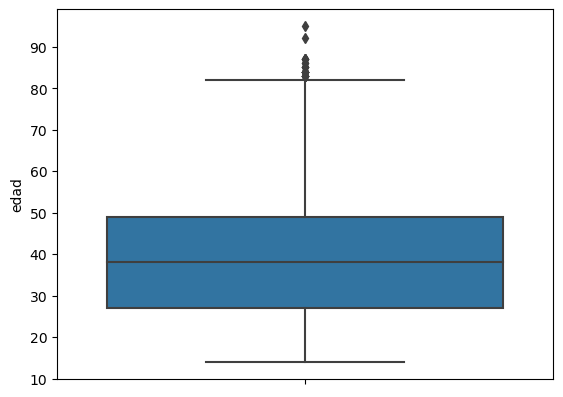

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya has leído tu archivo Parquet en un DataFrame llamado 'datos'

# Crea un box plot para una columna específica, por ejemplo, 'columna1'
sns.boxplot(y=df['edad'])
# Muestra el box plot
plt.show()

In [14]:
df['edad'].max()

95.0

In [15]:
mas_80 = df['edad'] > 80
suma_mas_80 = sum(mas_80)
print(suma_mas_80)

53


Respecto a la variable 'edad', no hay ningún dato irrealista, ya que es posible que una persona viva hasta los 95 años, que es el valor máximo. Las personas que tienen más de 80 años son 53, lo cual en un muestra de 52737 es una cantidad casi no significativa. Por lo tanto, no es necesario eliminar estos outliers ya que, por un lado, son acordes a la realidad y, por otro lado, su efecto sería ínfimo en los resultados del modelo. 

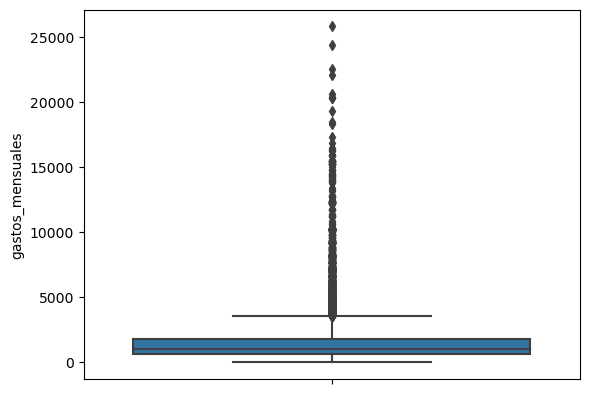

In [16]:
sns.boxplot(y=df['gastos_mensuales'])
plt.show()

In [17]:
df['gastos_mensuales'].max()

25838.781069118148

En una primera vista, en realidad no habría como poner un límite exacto a los gastos mensuales de una persona, ya que gastar casi 26000 soles al mes es posible para alguien que cuente con la capacidad de solventarlo. De esta forma, no hay nada de irreal en los outliers. No obstante, si es que quisieramos evaluar si esta variable contiene datos realistas, tendriamos que compararla con la edad o con el nivel educación. Para asegurarnos, la compararemos con la edad más adelante.

2.4. Evaluación de variables categóricas y binarias

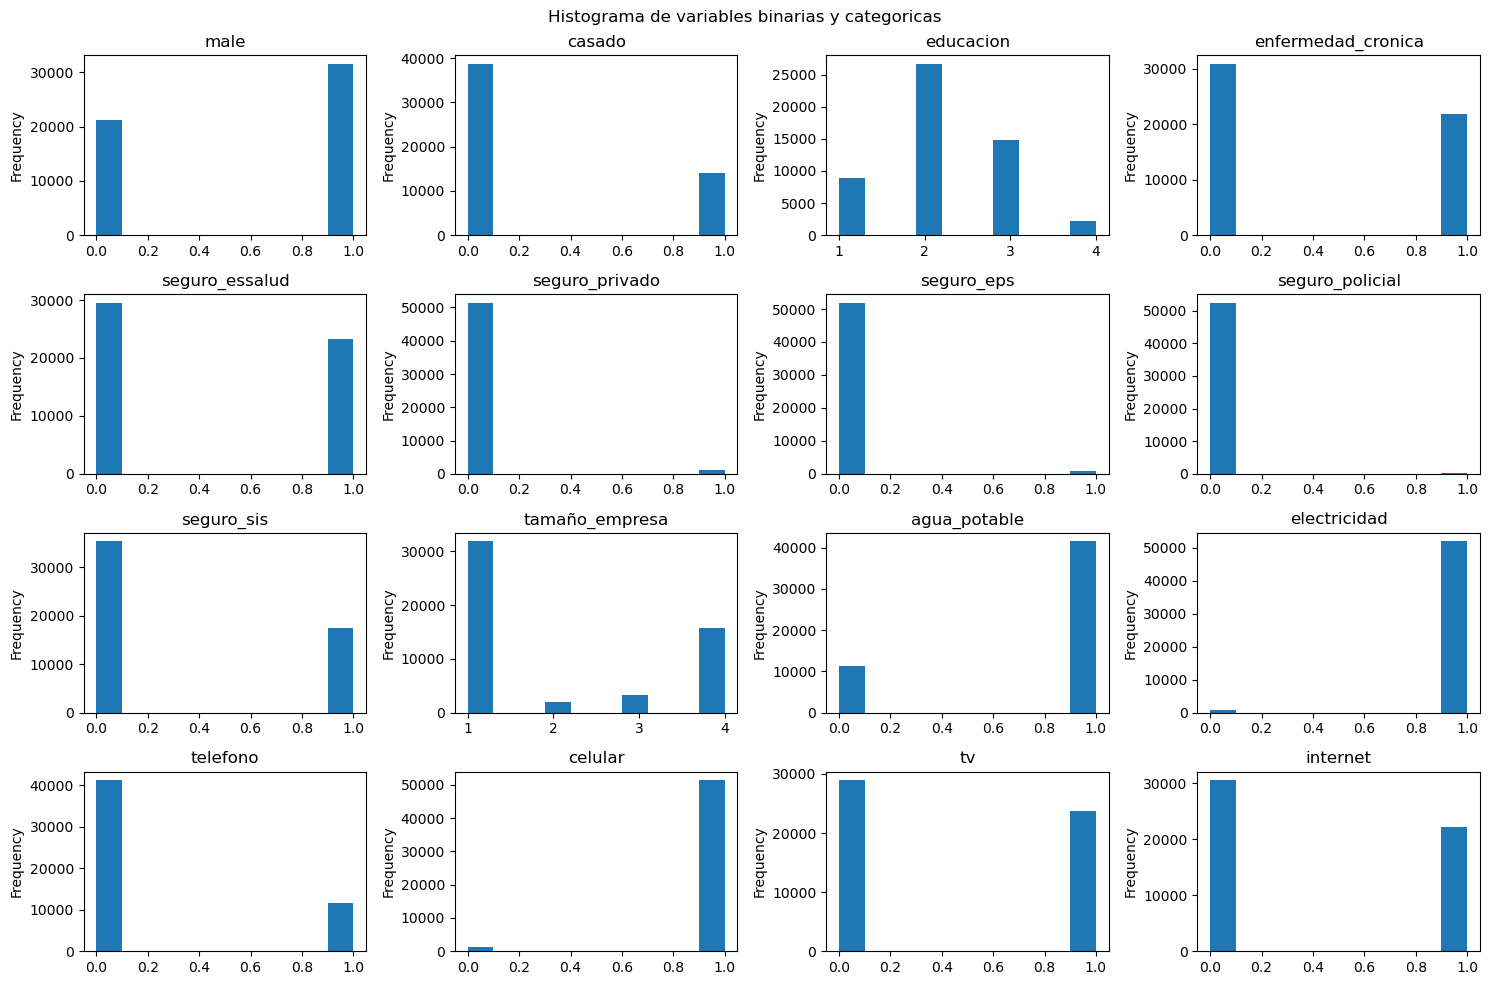

In [18]:
# Crear una figura con 4 filas y 2 columnas de subgráficos, con un tamaño de 15x10 pulgadas
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
# Aplanar la matriz de subgráficos para facilitar el acceso
axes = axes.flatten()
# Inicializar un índice para recorrer las columnas del DataFrame
ax_idx = 0
# Obtener las columnas del DataFrame, excluyendo la columna 'Outcome'
columns = df.drop(['gastos_mensuales','edad'], axis=1).columns
# Iterar a través de las columnas y crear histogramas en cada subgráfico
for col in columns:
    # Crear un histograma para la columna actual en el subgráfico correspondiente
    df[col].plot(kind='hist', ax=axes[ax_idx], title=col)
    # Incrementar el índice para pasar al siguiente subgráfico
    ax_idx += 1
# Agregar un título general para los subgráficos
plt.suptitle('Histograma de variables binarias y categoricas')
# Ajustar automáticamente la disposición de los subgráficos para evitar superposiciones
plt.tight_layout()
# Mostrar los subgráficos
plt.show()

De lo anterior, podemos ver que las variables categóricas son "educación" y "tamaño_empresa". Las demás son variables binarias. 

A continuación, veremos como se distribuyen estas variables.

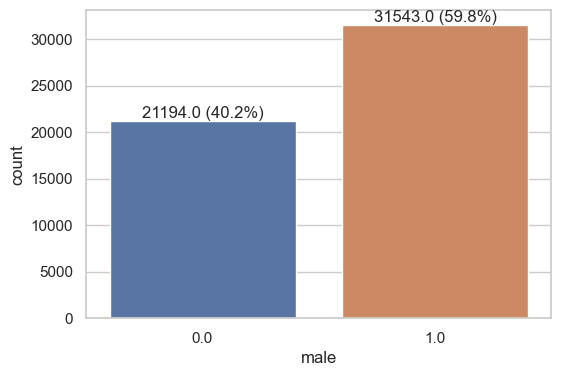

In [19]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='male', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Podemos ver que la muestra cuenta con más hombres que mujeres, con casi 20% de diferencia, lo cual no es poco. 

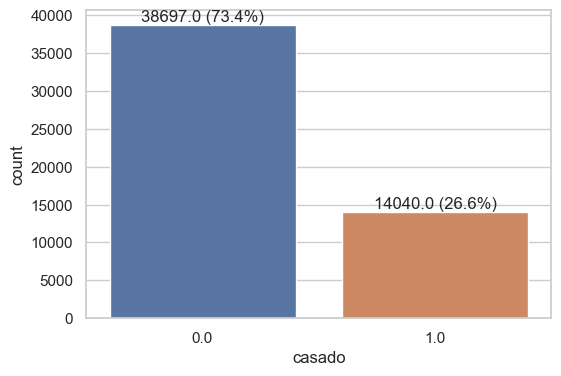

In [20]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='casado', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Podemos ver que la mayoría de la muestra es gente soltera. 

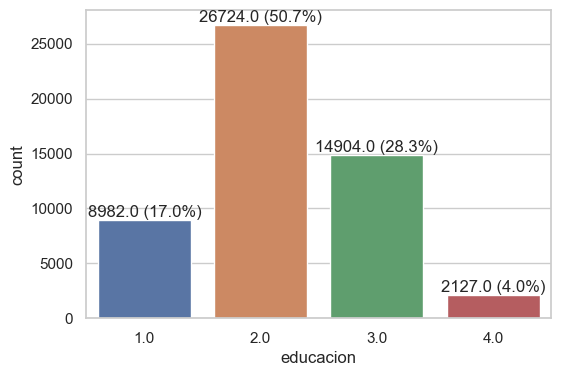

In [21]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='educacion', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Considerando que la categoría 1 es educación inicial, la 2 educación primaria, la 3 educación secundaria y la 4 educación superior. Entonces, podemos ver que la mayoría de la muestra cuenta con educación primaria.

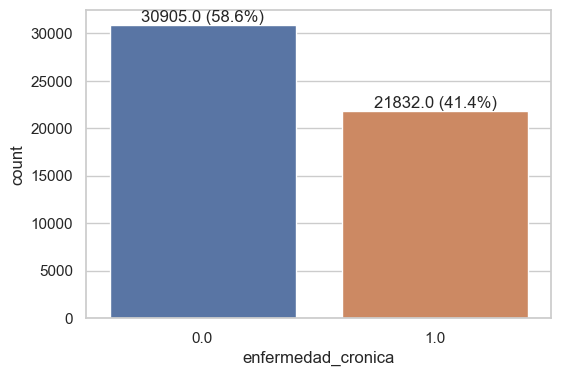

In [22]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='enfermedad_cronica', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Vemos que una buena parte de la muestra padece de enfermedades crónicas.

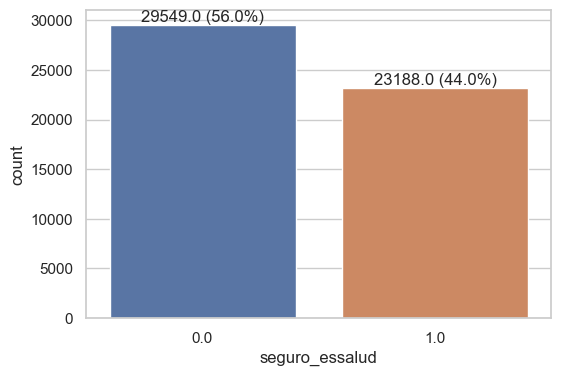

In [23]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='seguro_essalud', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Vemos que más del 40% de la muestra con seguro de Essaled.

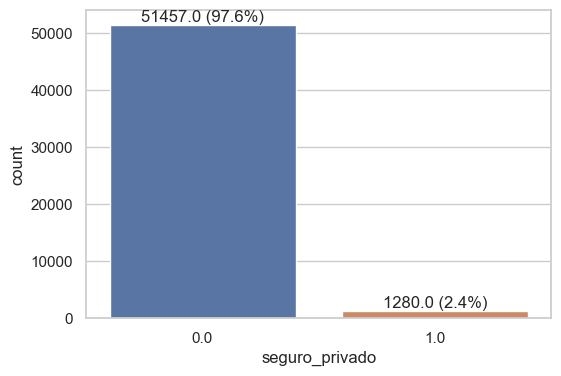

In [24]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='seguro_privado', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Podemos ver que una parte muy reducida de la muestra cuenta con un seguro privado.

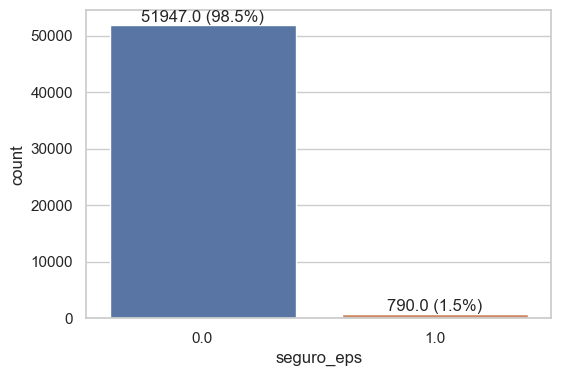

In [25]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='seguro_eps', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Vemos que incluso una parte más reducida que la del caso anterior cuenta con seguro EPS.

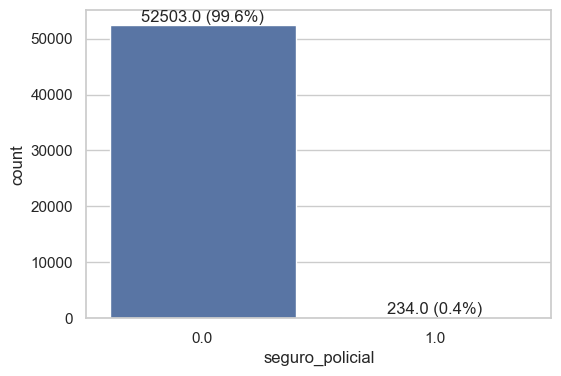

In [26]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='seguro_policial', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Vemos que una parte ínfima de la muestra cuenta con seguro policial.

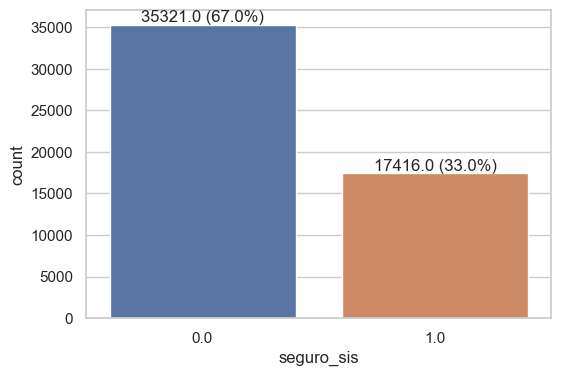

In [27]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='seguro_sis', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Finalmente, respecto a los seguros, vemos que el sis es el seguro con más afiliados en la muestra, y esto es acorde al contexto peruano, ya que el SIS es de acceso gratuito.

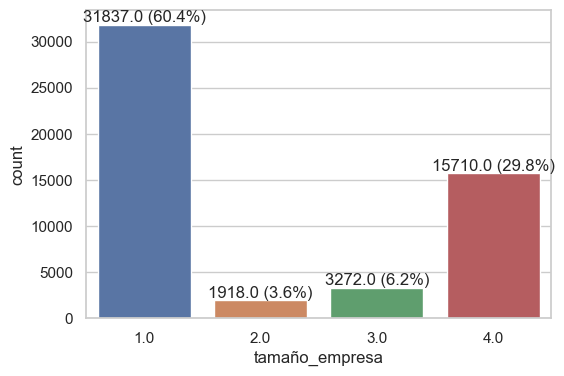

In [28]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='tamaño_empresa', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

La categoría 1 es microempresas, la 2 es pequeñas empresas, la 3 es medianas y la 4 grandes empresas, de lo que podemos ver que el grueso de la muestra se encuentra en microempresas.

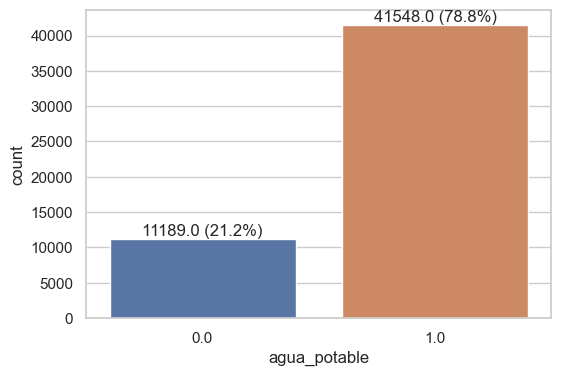

In [29]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='agua_potable', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Podemos ver gran parte de la muestra cuenta con agua potable, aunque es llamativo que este grupo no pase del 80%. 

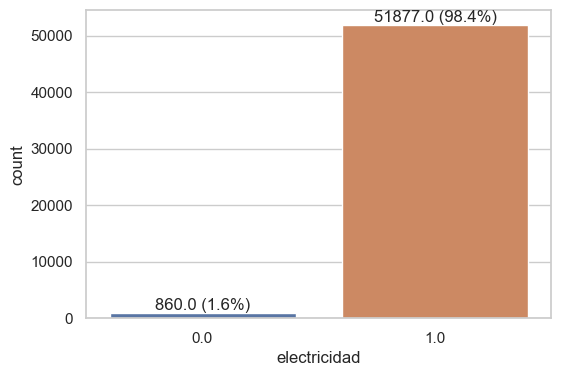

In [30]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='electricidad', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Casi toda la muestra cuenta con servicios de electricidad.

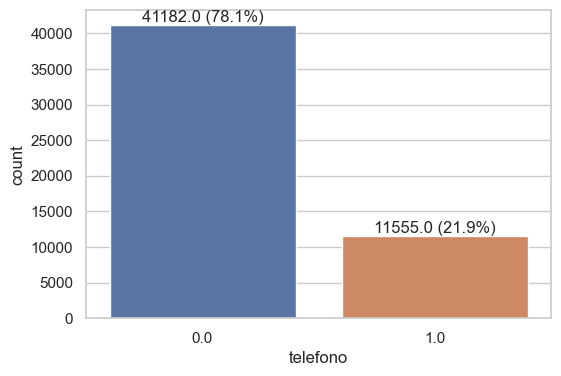

In [31]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='telefono', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Vemos que la mayoría de la muestra no cuenta con teléfono. 

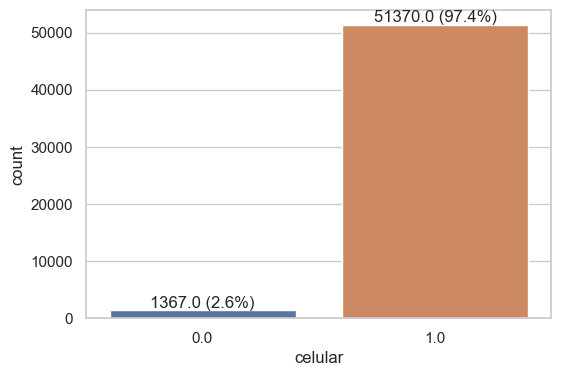

In [32]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='celular', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Casi toda la muestra cuenta con celular. 

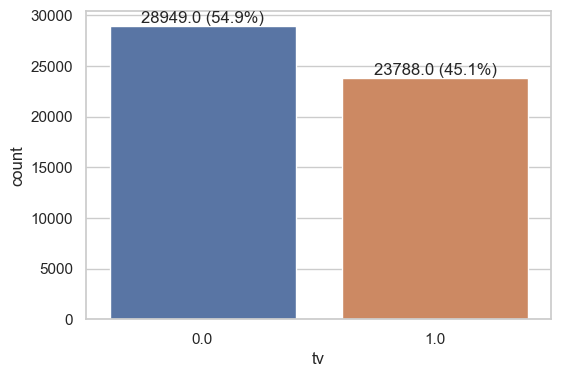

In [33]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='tv', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Podemos ver que un poco más de la mitad de la muestra no tiene televisión.

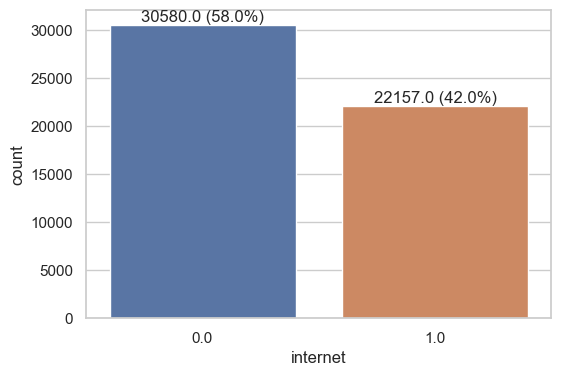

In [34]:
sns.set_theme(style="whitegrid")

# Crear el gráfico countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='internet', data=df)

# Agregar el valor y el porcentaje en paréntesis en cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.show()

Podemos ver que menos de la mitad de la muestra cuenta con servicios de internet.

2.5.

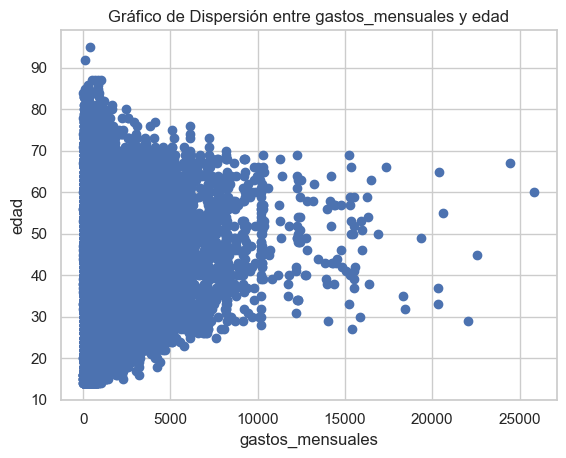

In [35]:
import matplotlib.pyplot as plt
# Crea un gráfico de dispersión para dos columnas específicas
plt.scatter(df['gastos_mensuales'], df['edad'])
plt.xlabel('gastos_mensuales')
plt.ylabel('edad')
plt.title('Gráfico de Dispersión entre gastos_mensuales y edad')
plt.show()

Tenemos un gráfico interesante, ya que tiene una forma peculiar, pero con sentido. Hasta la pasados los 20 años, podemos ver como el gráfico tiene cierta tendencia positiva, es decir, a más edad, más gasto mensual, y es por eso que se dirige hacia la derecha, lo cual no le quita relevancia a aquello que tienen más de 20 pero tienen gastos mensuales reducidos. Después de ello, podemos ver que se sigue cumpliendo que a más edad más gasto mensual, pero en menor medida. Incluso podemos ver que el máximo outlier de más de 25000 soles de gasto mensual correponde a una persona de 60 años. Pero es este el límite de esta tendencia, después es claro que a más edad, menos gastos. Y es que al llegar a la vejez, los individuos se jubilan o se retiran de sus trabajos, por lo que sus ingresos también se ven reducidos, por lo que tiene sentido que gasten menos. De esta forma, este gráfico muestra datos acordes con la realidad, por lo que no consideramos necesario borrar los outliers de estas dos variables.

2.6.

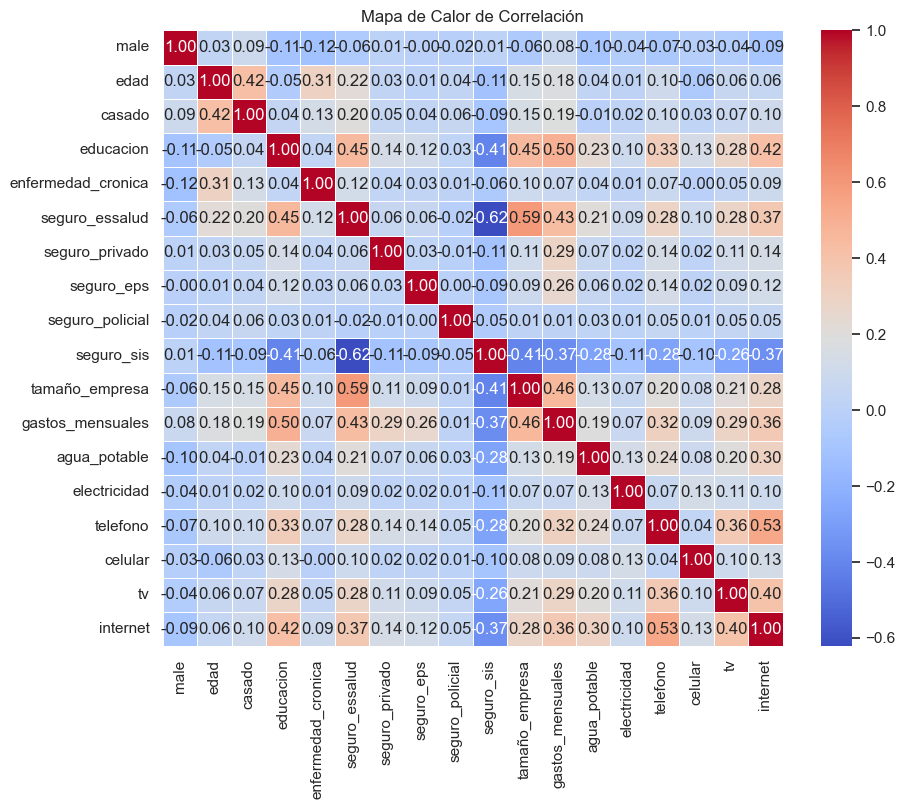

In [36]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

No se encuentra ninguna correlación preocupante, salvo de la de -0.62 entre los que tienen seguro de essalud y SIS. Esto se tendrá en cuenta en el modelo a la hora de evaluar el aporte y la significancia de estas variables en el modelo, para analizar si es que es necesario eliminar alguna de ellas y asi evitar multicolinealidad. 

### 3. Entrenamiento del modelo

Probaremos los modelos de Regresion Lasso, Random Forest, XGBoost y Lineal para poder obtener la conclusión de cual brinda o se acerca más a valores reales de los gastos mensuales. 

In [37]:
X = df.drop('gastos_mensuales', axis=1)
y = df['gastos_mensuales']

In [38]:
from sklearn.model_selection import train_test_split
# Suponiendo que 'X' es tu conjunto de características y 'y' es tu variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape

(42189, 17)

In [40]:
X_test.shape

(10548, 17)

In [41]:
from sklearn.preprocessing import StandardScaler
# Estandarizamos las variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled.shape

(42189, 17)

In [43]:
# Esta función nos servirá para obtener un recuadro con las métricas de cada uno de los modelos.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agregamos el MAPE a la función
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Agregamos el MPE a la función
def mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

def validation(fit, outcome):
    mse = mean_squared_error(outcome, fit).round(4)
    r2 = r2_score(outcome, fit).round(4)
    mae = mean_absolute_error(outcome, fit).round(4)
    mape_score = mape(outcome, fit).round(4)
    mpe_score = mpe(outcome, fit).round(4)

    the_table = [['Conteo', len(outcome)],
                 ['MSE', mse],
                 ['R^2', r2],
                 ['MAE', mae],
                 ['RMSE', np.sqrt(mse).round(4)],
                 ['MAPE', mape_score],
                 ['MPE', mpe_score]]

    the_table = pd.DataFrame(data=the_table)
    the_table.columns = ['Métrica', 'Valor']

    plt.figure(figsize=(10, 8))  

    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.subplot(321)
    plt.title('Indicadores')
    plt.axis('off')
    plt.axis('tight')
    test = plt.table(cellText=the_table.values, colLabels=the_table.columns, loc='center', cellLoc='center',
                     colWidths=[0.34, 0.2])
    test.auto_set_font_size(False)
    test.set_fontsize(12)
    test.scale(2, 1)

    plt.show()
 

## Modelos

### 1. Modelo de Regresion Lasso


##### El modelo Lasso es una técnica de regularización en aprendizaje automático que combina la regresión lineal con un término de penalización L1 en la función de pérdida. Esta penalización impone una restricción en la suma de los valores absolutos de los coeficientes del modelo, lo que conduce a la selección automática de características al forzar algunos coeficientes a ser exactamente cero. El parámetro de regularización (α) controla la fuerza de esta penalización, permitiendo un equilibrio entre el ajuste del modelo y la simplicidad al eliminar características menos relevantes.

In [78]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Definir los valores de alpha que quieres probar
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Crear el modelo Lasso
lasso_model = Lasso()

# Configurar la búsqueda grid con validación cruzada
grid_search = GridSearchCV(lasso_model, {'alpha': alphas}, cv=5, scoring='r2') # En base al R^2

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Imprimir el mejor valor de alpha encontrado
print("Mejor valor de alpha:", grid_search.best_params_)

Mejor valor de alpha: {'alpha': 0.1}


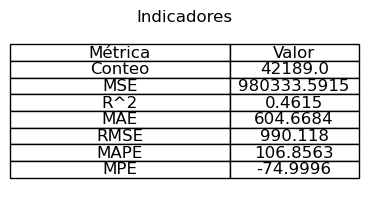

In [72]:
# Modelo de Regresión Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

lasso_train_predictions = lasso_model.predict(X_train_scaled)

# Validación del modelo en datos de entrenamiento
validation(lasso_train_predictions, y_train)


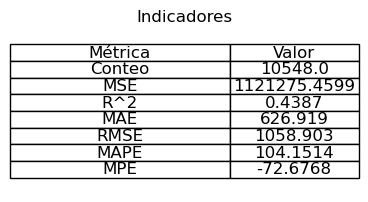

In [73]:
# Predicciones en datos de prueba
lasso_test_predictions = lasso_model.predict(X_test_scaled)
# Validación del modelo en datos de prueba
validation(lasso_test_predictions, y_test)

In [74]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Definir una función de puntuación personalizada para MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Convertir la función en un objeto de puntuación
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Definir los valores de alpha que quieres probar
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Crear el modelo Lasso
lasso_model = Lasso()

# Configurar la búsqueda grid con validación cruzada y usar la función de puntuación MAPE
grid_search = GridSearchCV(lasso_model, {'alpha': alphas}, cv=5, scoring=mape_scorer)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Imprimir el mejor valor de alpha encontrado
print("Mejor valor de alpha:", grid_search.best_params_)


Mejor valor de alpha: {'alpha': 0.001}


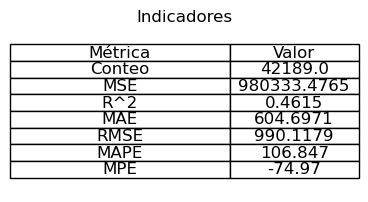

In [75]:
# Modelo de Regresión Lasso
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train_scaled, y_train)

lasso_train_predictions_1 = lasso_model.predict(X_train_scaled)

# Validación del modelo en datos de entrenamiento
validation(lasso_train_predictions_1, y_train)

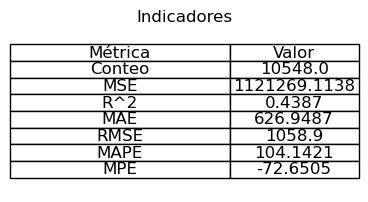

In [76]:
# Predicciones en datos de prueba
lasso_test_predictions_1 = lasso_model.predict(X_test_scaled)
# Validación del modelo en datos de prueba
validation(lasso_test_predictions_1, y_test)

Podemos ver que optimizando el alpha respecto al MAPE se obtienen resultados ligeramente mejores en las métricas. 

### 2. Modelo de Random Forest

##### Random Forest construye múltiples árboles de decisión durante el entrenamiento. Cada árbol se entrena con una muestra aleatoria del conjunto de datos y con una selección aleatoria de características. Esto se hace para introducir diversidad entre los árboles y evitar el sobreajuste. Durante la predicción, cada árbol vota por una clase o regresión, y la predicción final se determina por votación (clasificación) o promedio (regresión) de los resultados de todos los árboles. Esta técnica ayuda a mejorar la generalización del modelo y a manejar conjuntos de datos grandes y complejos.

In [37]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Optimizamos hiperparámetros para tener una idea de cómo configurarlos en los modelos a usar
params_rfc = {
    'n_estimators': randint(1, 500),
    'max_depth': [2, 3, 4, 5, 10, None],
    'max_features': randint(1, 10),
    'min_samples_split': randint(2, 11)}

model_rfc = RandomForestRegressor(random_state=12345)
rs_rfc = RandomizedSearchCV(model_rfc, params_rfc, verbose=1, n_iter=50, n_jobs=4, cv=5, random_state=12345, scoring='r2') # El modelo se basa en el R^2
rs_rfc.fit(X_train_scaled, y_train)

print(rs_rfc.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'max_depth': 10, 'max_features': 6, 'min_samples_split': 9, 'n_estimators': 332}


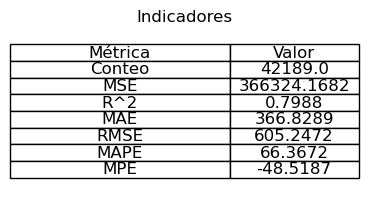

In [38]:
# Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=332, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicciones sobre la data train
rf_train_predictions = rf_model.predict(X_train_scaled)

# Validación del modelo en datos de entrenamiento
validation(rf_train_predictions, y_train)

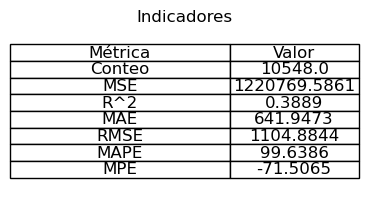

In [39]:
# Predicciones en datos de prueba
rf_test_predictions = rf_model.predict(X_test_scaled)
# Validación del modelo en datos de prueba
validation(rf_test_predictions, y_test)

Podemos ver que la caída, en términos de R^2, es bastante grande. Entonces, probaremos a basar la optimización de hiperparámetros en términos del MSE.

In [40]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Optimizamos hiperparámetros para tener una idea de cómo configurarlos en los modelos a usar
params_rfc = {
    'n_estimators': randint(1, 500),
    'max_depth': [2, 3, 4, 5, 10, None],
    'max_features': randint(1, 10),
    'min_samples_split': randint(2, 11)}

model_rfc = RandomForestRegressor(random_state=12345)
rs_rfc = RandomizedSearchCV(model_rfc, params_rfc, verbose=1, n_iter=50, n_jobs=4, cv=5, random_state=12345, scoring='neg_mean_squared_error') # El modelo se basa en el MSE
rs_rfc.fit(X_train_scaled, y_train)

print(rs_rfc.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'max_depth': 10, 'max_features': 6, 'min_samples_split': 9, 'n_estimators': 332}


Podemos ver que el resultado es el mismo, entonces ya no es necesario hacer una nueva regresion, ya que el resultado será el mismo. Intentaremos hacerlo en base al MAPE, como en el caso anterior, para ver si esta caída se arregla. 

In [64]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import numpy as np

# Definir una función de puntuación personalizada para MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Convertir la función en un objeto de puntuación
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Definir parámetros y modelo
params_rfc = {
    'n_estimators': randint(1, 500),
    'max_depth': [2, 3, 4, 5, 10, None],
    'max_features': randint(1, 10),
    'min_samples_split': randint(2, 11)}

model_rfc = RandomForestRegressor(random_state=12345)

# Realizar la búsqueda aleatoria con optimización respecto al MAPE
rs_rfc = RandomizedSearchCV(
    model_rfc, params_rfc, verbose=1, n_iter=50, n_jobs=4, cv=5, random_state=12345,
    scoring=mape_scorer)  # Usar la función de puntuación MAPE

rs_rfc.fit(X_train_scaled, y_train)

# Imprimir los mejores parámetros encontrados
print(rs_rfc.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'max_depth': 10, 'max_features': 8, 'min_samples_split': 7, 'n_estimators': 302}


Ahora sí hay un cambio: 302 estimadores en vez de 332. 

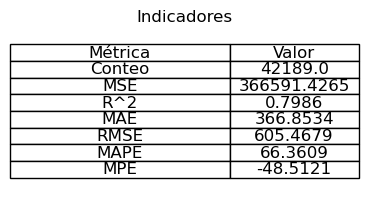

In [65]:
# Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=302, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicciones sobre la data train
rf_train_predictions = rf_model.predict(X_train_scaled)

# Validación del modelo en datos de entrenamiento
validation(rf_train_predictions, y_train)

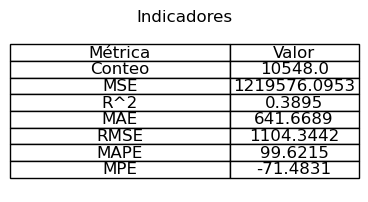

In [66]:
# Predicciones en datos de prueba
rf_test_predictions = rf_model.predict(X_test_scaled)
# Validación del modelo en datos de prueba
validation(rf_test_predictions, y_test)

Obtenemos, nuevamente, resultados ligeramente mejores.

### 3. Modelo XGBOOST

##### XGBoost emplea un enfoque de ensamblaje secuencial de árboles de decisión, comenzando con un árbol simple y mejorándolo iterativamente. En cada iteración, se calculan los residuos entre las predicciones actuales y los valores reales, y se entrena un nuevo árbol para corregir estos residuos. El modelo se actualiza considerando la contribución del nuevo árbol y se aplica regularización para evitar el sobreajuste. Este proceso se repite para agregar más árboles al modelo, priorizando la corrección de errores residuales.

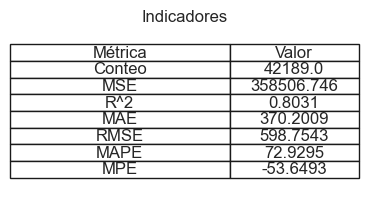

In [44]:
# Dado que con la optimización basada en el MAPE ha dado los mejores resultados, es esta la que se utilizará para el XGBoost.
import xgboost as xgb

# Modelo de Regresión XGBoost
model_xgboost = xgb.XGBRegressor(booster='gbtree', max_depth=10, n_estimators=302,
                                subsample=0.8, learning_rate=0.1, seed=12345)
model_xgboost.fit(X_train_scaled, y_train)


xgboost_train_predictions = model_xgboost.predict(X_train_scaled)

# Validación del modelo en datos de entrenamiento
validation(xgboost_train_predictions, y_train)

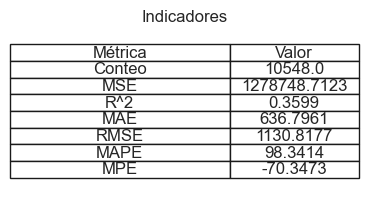

In [45]:
xgboost_test_predictions = model_xgboost.predict(X_test_scaled)

# Validación del modelo en datos de entrenamiento
validation(xgboost_test_predictions, y_test)

Podemos ver que el modelo XGBoost, optimizado en base al MAPE, tiene un mejor MAPE y MPE que el modelo Random Forest, ya que su MAPE es menor y su MPE es más cercano a cero. 

### 4. Regresion Lineal

##### La regresión lineal múltiple es un enfoque estadístico utilizado para modelar la relación entre una variable de interés y varias variables predictoras. A diferencia de la regresión lineal simple, que se centra en encontrar la mejor línea recta para ajustarse a dos variables, la regresión lineal múltiple extiende este concepto para abordar múltiples factores influyentes. El modelo busca encontrar una ecuación lineal que combine de manera óptima las contribuciones de cada variable predictora, representada por sus respectivos coeficientes. Estos coeficientes se determinan mediante métodos como el de mínimos cuadrados, minimizando la discrepancia entre las predicciones del modelo y los valores reales

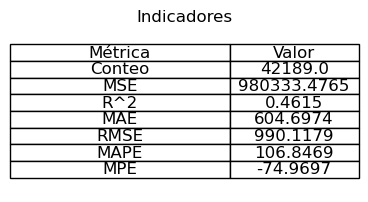

In [43]:
from sklearn.linear_model import LinearRegression

# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

linear_train_predictions = linear_model.predict(X_train_scaled)

# Validación del modelo en datos de entrenamiento
validation(linear_train_predictions, y_train)

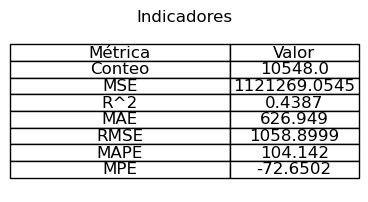

In [44]:
linear_test_predictions = linear_model.predict(X_test_scaled)

# Validación del modelo en datos de entrenamiento
validation(linear_test_predictions, y_test)

## Síntesis y elección de mejor modelo
##### Dado que el MAPE mide el promedio de los errores porcentuales absolutos entre las predicciones y los valores reales, y el MPE hace lo mismo solo que sin considerar su valor absoluto, son estas las métricas que se priorizan para evaluar cuál modelo es mejor en términos de desempeño, dado que nos encontramos en un contexto de Machine Learning. 
##### En este sentido, lo que se haya es que el modelo Lasso y el modelo lineal presentan las mismas métricas en términos de MAPE, MPE y R2, mientras que el modelo Random Forest y el modelo XGBoost presentan buenas métricas con la data de entrenamiento, pero con la data test sufren una pérdida notoria. 
##### No obstante, dado que lo que estamos buscando es el modelo que tenga los menores errores entre las predicciones y los valores reales, el modelo que se elige es el XGBoost, dado que presenta un MAPE y un MPE más reducido que los otros modelos. 

##### Utilidades del modelo:
- Gestión de Riesgos: Las instituciones financieras pueden utilizar el modelo para evaluar el riesgo crediticio y financiero asociado con los clientes. Entender los patrones de gasto y la capacidad de pago de los individuos ayuda a gestionar el riesgo al otorgar préstamos o créditos. Además, puede contribuir a la identificación temprana de posibles problemas financieros.
- Predicción de Demanda: Las empresas pueden utilizar el modelo para prever la demanda de productos y servicios en función de los patrones de gasto de los consumidores. Esto permite una mejor planificación de inventarios y optimización de la cadena de suministro, evitando excesos o déficits de existencias.